In [76]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kelumrubasin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [77]:
# Authentication
consumerKey = "L45cVwt1PcimfFnycMhQEHRsg"
consumerSecret = "a2f3dr6xHHukbCzlvzK5j0mDYg3di3aN8EfixXOhzV9dbhMk1F"
accessToken = "1533339797187883008-A5uEjCSsKsH4OBeTaO8g0vHaqoI8h6"
accessTokenSecret = "UKvwBMeTRN6p4f2ogcrQAQT52Fi6eWUhe2pCnEkaJ8UGq"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [78]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

number_of_tweets = 200
twitter_username = "CbHLands"
display_name = "CBH Lands"

tweets = tweepy.Cursor(api.user_timeline, screen_name = twitter_username, tweet_mode = "extended").items(number_of_tweets)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.full_text)
    analysis = TextBlob(tweet.full_text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.full_text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.full_text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.full_text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.full_text)
        neutral += 1

positive = percentage(positive, number_of_tweets)
negative = percentage(negative, number_of_tweets)
neutral = percentage(neutral, number_of_tweets)
polarity = percentage(polarity, number_of_tweets)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [79]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  58
positive number:  21
negative number:  3
neutral number:  34


In [80]:
tweet_list

,0
0,Organic agriculture is a time consuming proces...
1,Out of #space #location and #budget which one ...
2,Can brand new cities kick off? Or do legacy ci...
3,Many #Global #Financial experts have been high...
4,#asiancrisis #thailand #thaicrisis #srilanka #...
5,https://t.co/QaKN8ufjof https://t.co/zvrDSzPKLY
6,RT @yatilawijemanne: #realestate the stepping ...
7,Launch of #myhomekurunegala https://t.co/JmTE4...
8,"Central Expressway, the game changer. #kuruneg..."
9,CBH Lands opens up new avenues for real estate...


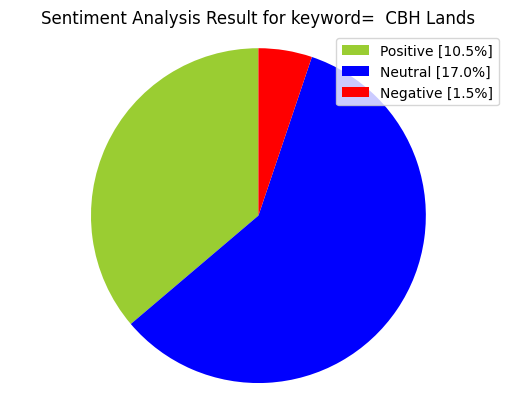

In [81]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+display_name+"" )
plt.axis('equal')
plt.show()

In [82]:
tweet_list.drop_duplicates(inplace = True)

In [83]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Organic agriculture is a time consuming proces...,Organic agriculture is a time consuming proces...
1,Out of #space #location and #budget which one ...,Out of #space #location and #budget which one ...
2,Can brand new cities kick off? Or do legacy ci...,Can brand new cities kick off? Or do legacy ci...
3,Many #Global #Financial experts have been high...,Many #Global #Financial experts have been high...
4,#asiancrisis #thailand #thaicrisis #srilanka #...,#asiancrisis #thailand #thaicrisis #srilanka #...
5,https://t.co/QaKN8ufjof https://t.co/zvrDSzPKLY,https://t.co/QaKN8ufjof https://t.co/zvrDSzPKLY
6,RT @yatilawijemanne: #realestate the stepping ...,RT @yatilawijemanne: #realestate the stepping ...
7,Launch of #myhomekurunegala https://t.co/JmTE4...,Launch of #myhomekurunegala https://t.co/JmTE4...
8,"Central Expressway, the game changer. #kuruneg...","Central Expressway, the game changer. #kuruneg..."
9,CBH Lands opens up new avenues for real estate...,CBH Lands opens up new avenues for real estate...


In [84]:
tweet_list

,0,text
0,Organic agriculture is a time consuming proces...,Organic agriculture is a time consuming proces...
1,Out of #space #location and #budget which one ...,Out of #space #location and #budget which one ...
2,Can brand new cities kick off? Or do legacy ci...,Can brand new cities kick off? Or do legacy ci...
3,Many #Global #Financial experts have been high...,Many #Global #Financial experts have been high...
4,#asiancrisis #thailand #thaicrisis #srilanka #...,#asiancrisis #thailand #thaicrisis #srilanka #...
5,https://t.co/QaKN8ufjof https://t.co/zvrDSzPKLY,https://t.co/QaKN8ufjof https://t.co/zvrDSzPKLY
6,RT @yatilawijemanne: #realestate the stepping ...,RT @yatilawijemanne: #realestate the stepping ...
7,Launch of #myhomekurunegala https://t.co/JmTE4...,Launch of #myhomekurunegala https://t.co/JmTE4...
8,"Central Expressway, the game changer. #kuruneg...","Central Expressway, the game changer. #kuruneg..."
9,CBH Lands opens up new avenues for real estate...,CBH Lands opens up new avenues for real estate...


In [85]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Organic agriculture is a time consuming proces...,organic agriculture is a time consuming proces...
1,Out of #space #location and #budget which one ...,out of space location and budget which one ...
2,Can brand new cities kick off? Or do legacy ci...,can brand new cities kick off or do legacy ci...
3,Many #Global #Financial experts have been high...,many global financial experts have been high...
4,#asiancrisis #thailand #thaicrisis #srilanka #...,asiancrisis thailand thaicrisis srilanka ...
5,https://t.co/QaKN8ufjof https://t.co/zvrDSzPKLY,
6,RT @yatilawijemanne: #realestate the stepping ...,realestate the stepping stone for financial ...
7,Launch of #myhomekurunegala https://t.co/JmTE4...,launch of myhomekurunegala
8,"Central Expressway, the game changer. #kuruneg...",central expressway the game changer kuruneg...
9,CBH Lands opens up new avenues for real estate...,cbh lands opens up new avenues for real estate...


In [86]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Organic agriculture is a time consuming proces...,organic agriculture is a time consuming proces...,0.850000,1.000000,positive,0.000,0.737,0.263,0.7469
1,Out of #space #location and #budget which one ...,out of space location and budget which one ...,-0.125000,0.375000,neutral,0.000,1.000,0.000,0.0000
2,Can brand new cities kick off? Or do legacy ci...,can brand new cities kick off or do legacy ci...,0.318182,0.477273,positive,0.000,0.879,0.121,0.4404
3,Many #Global #Financial experts have been high...,many global financial experts have been high...,0.041667,0.291667,negative,0.056,0.944,0.000,-0.0772
4,#asiancrisis #thailand #thaicrisis #srilanka #...,asiancrisis thailand thaicrisis srilanka ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,https://t.co/QaKN8ufjof https://t.co/zvrDSzPKLY,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
6,RT @yatilawijemanne: #realestate the stepping ...,realestate the stepping stone for financial ...,0.500000,0.150000,positive,0.000,0.708,0.292,0.7650
7,Launch of #myhomekurunegala https://t.co/JmTE4...,launch of myhomekurunegala,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,"Central Expressway, the game changer. #kuruneg...",central expressway the game changer kuruneg...,-0.200000,0.325000,neutral,0.000,1.000,0.000,0.0000
9,CBH Lands opens up new avenues for real estate...,cbh lands opens up new avenues for real estate...,0.168182,0.377273,neutral,0.000,1.000,0.000,0.0000


In [87]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [88]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [89]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,34,58.62
positive,21,36.21
negative,3,5.17


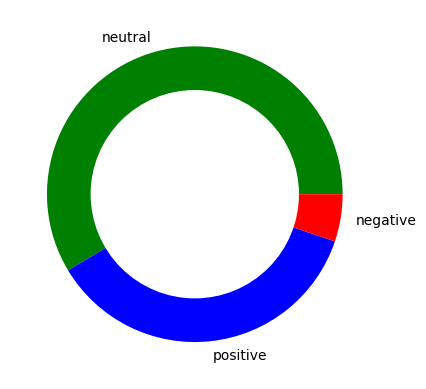

In [90]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [91]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

    

Word Cloud Saved Successfully


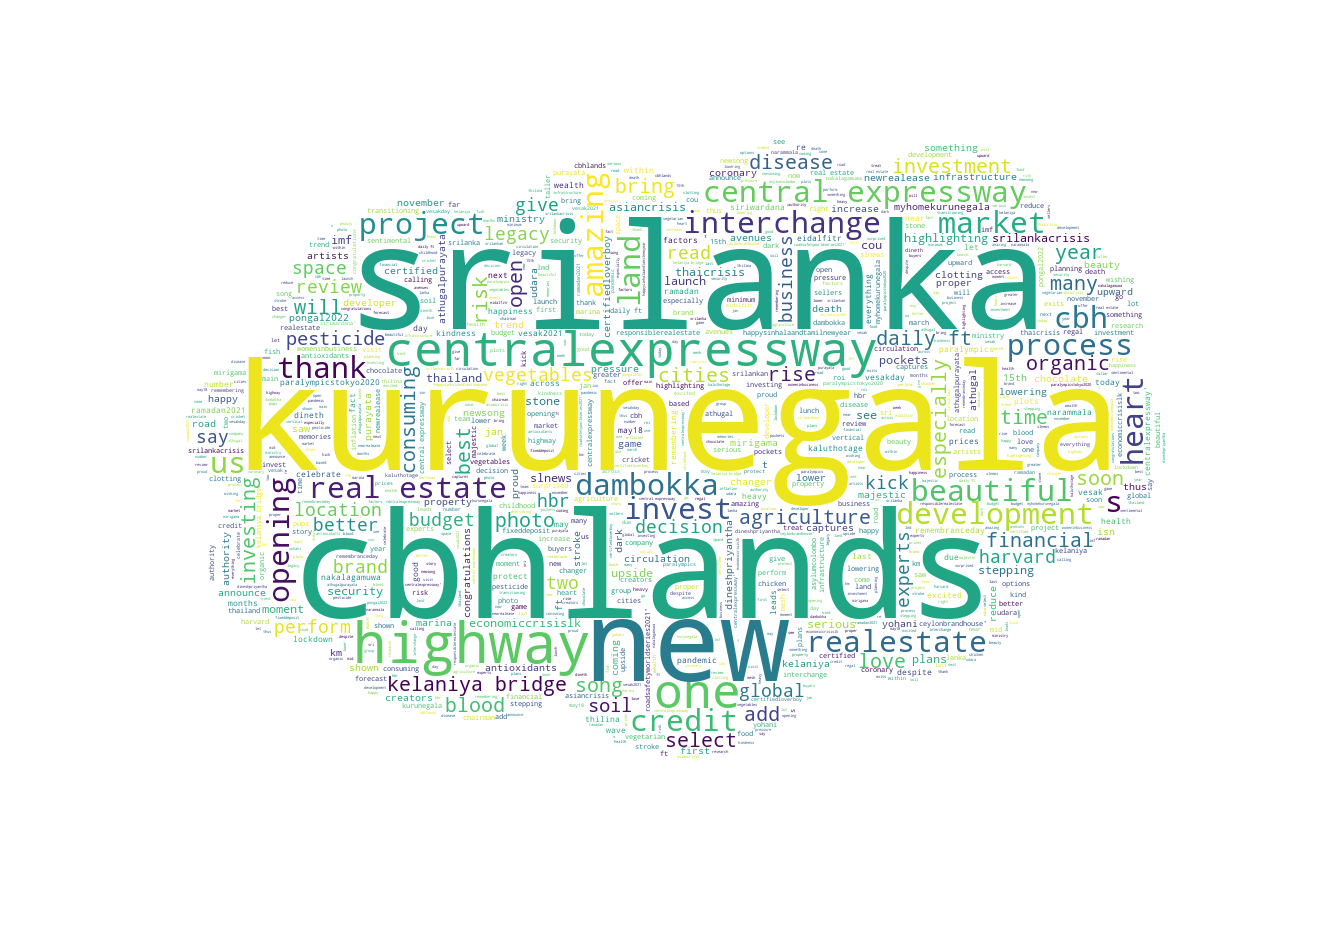

In [92]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


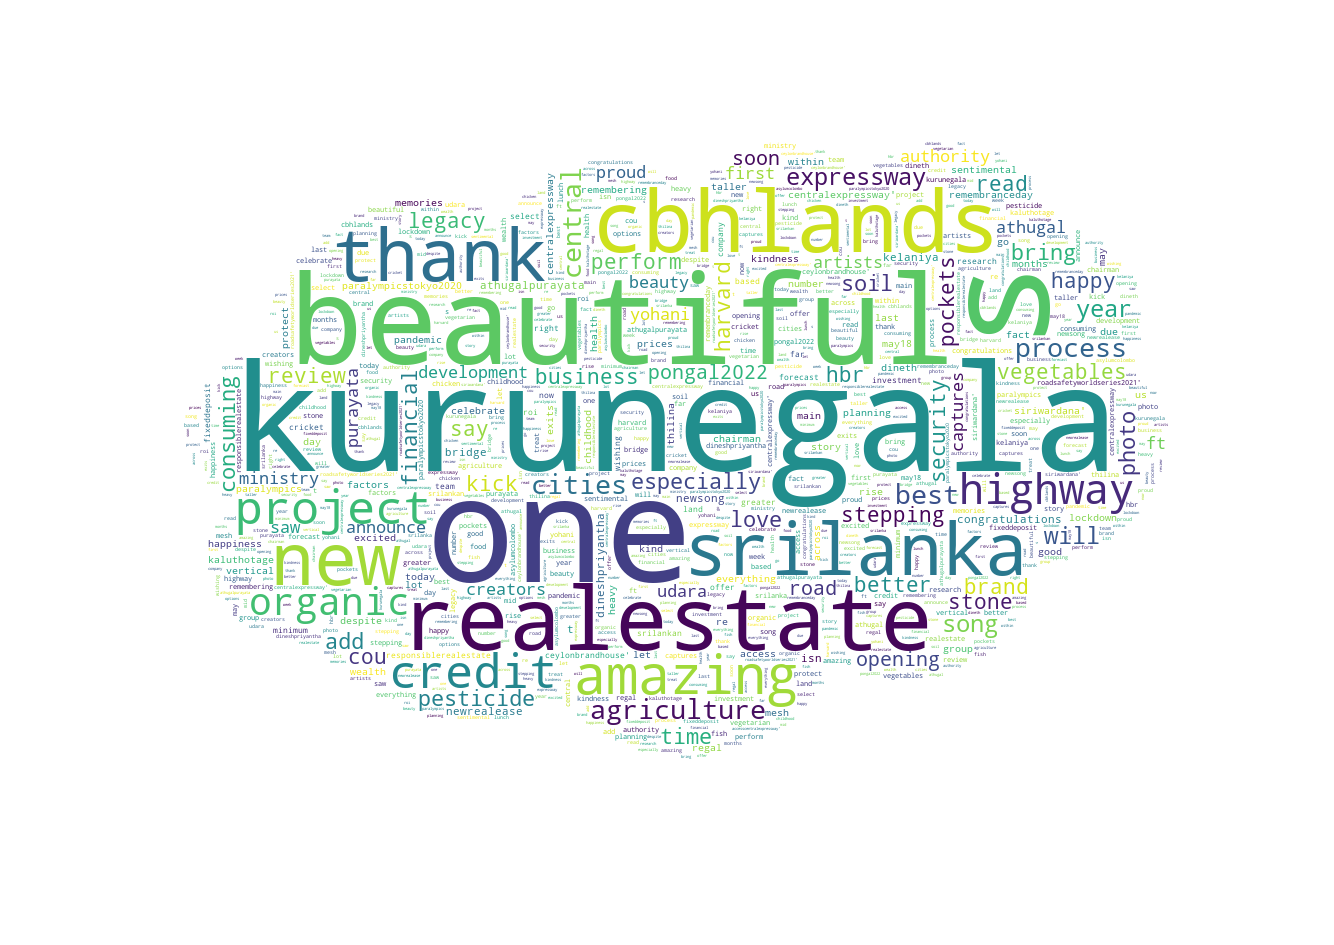

In [93]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


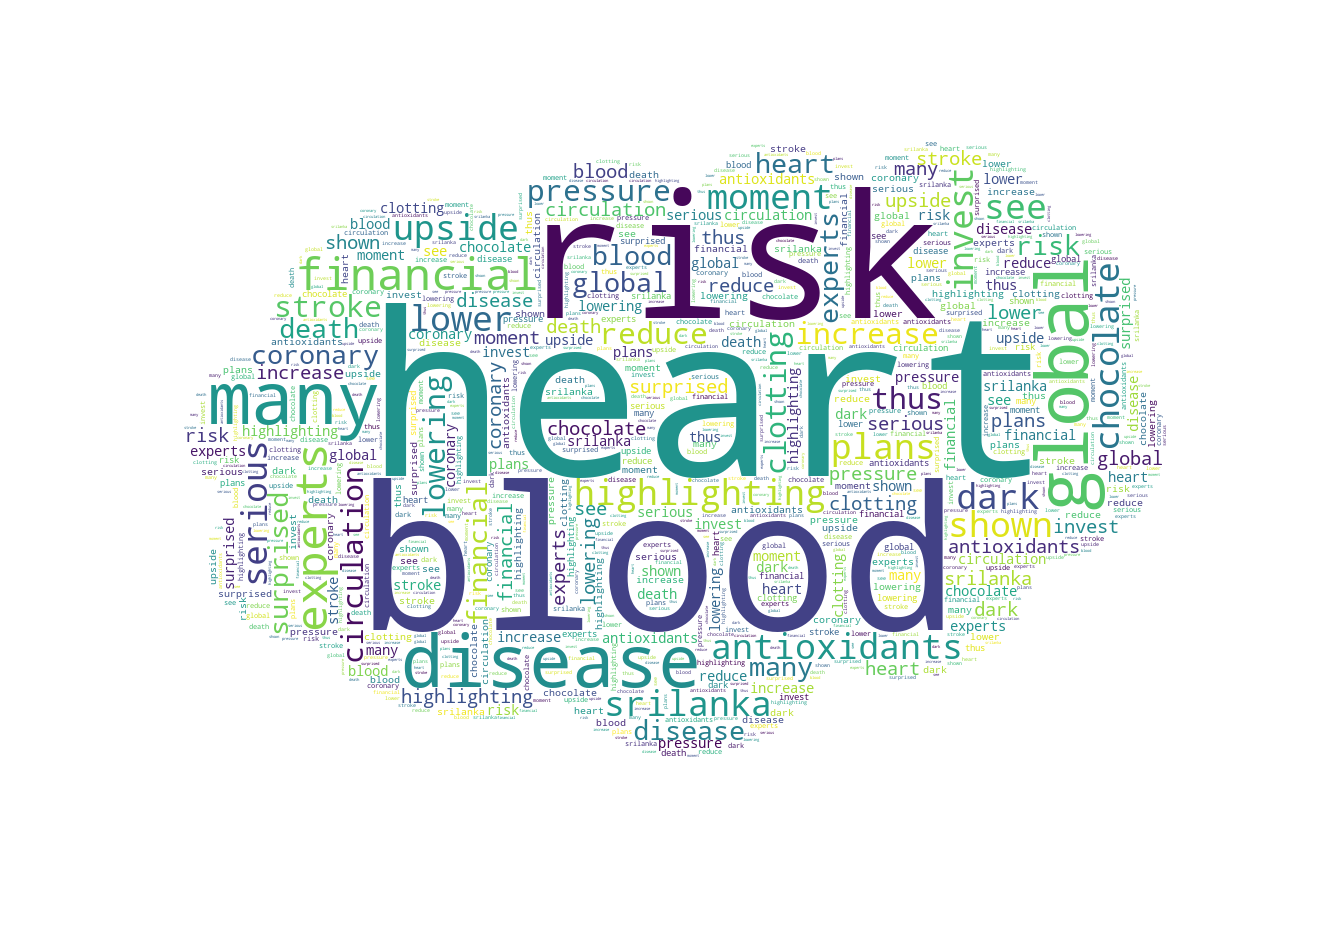

In [94]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


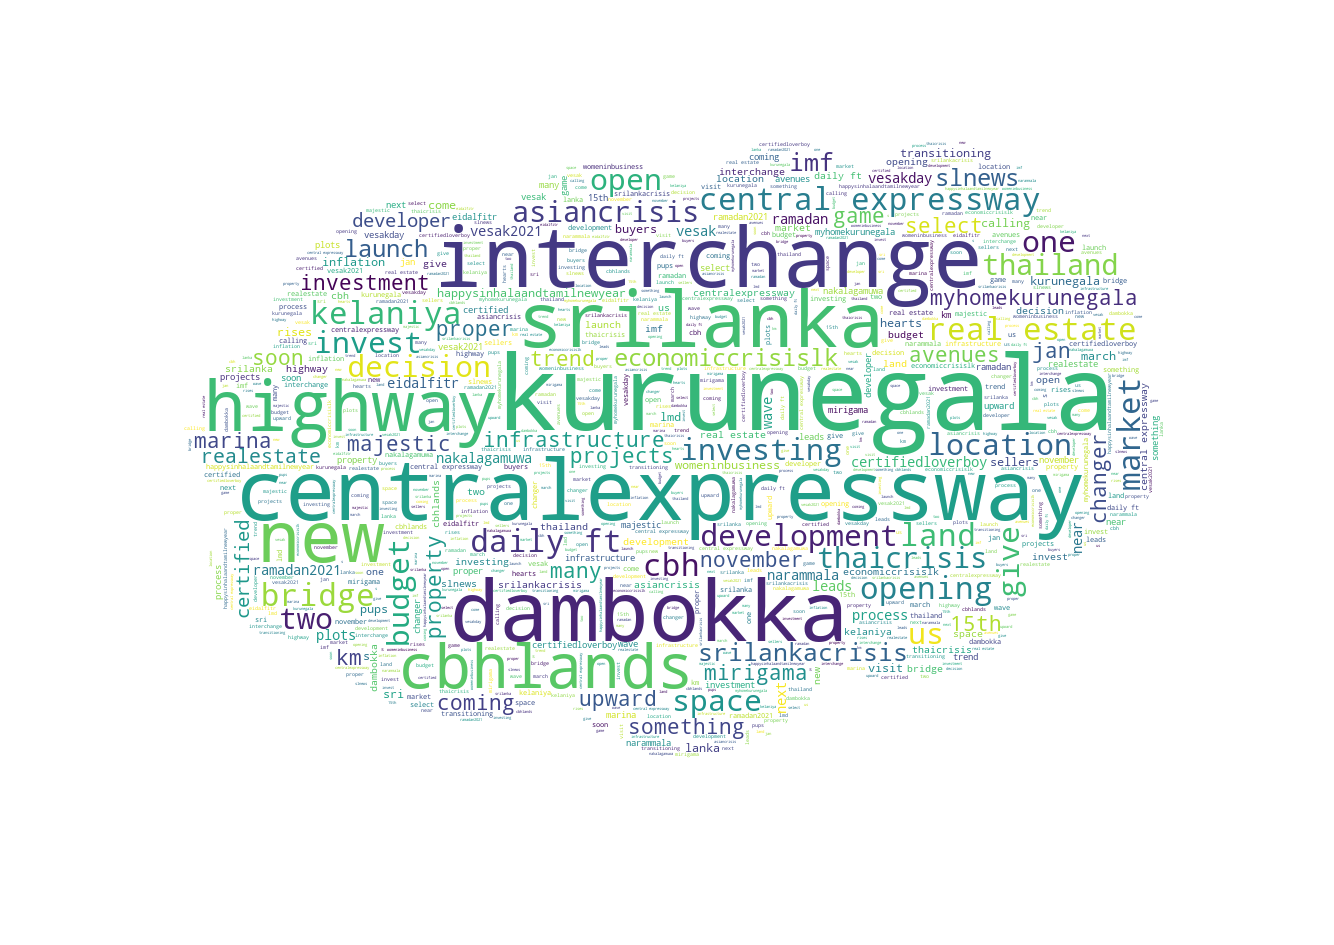

In [95]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [96]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [97]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,134.33
neutral,53.74
positive,113.19


In [98]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,22.00
neutral,6.56
positive,16.90


In [99]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [100]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [101]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [102]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))


In [103]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [104]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Organic agriculture is a time consuming proces...,organic agriculture is a time consuming proces...,0.850000,1.000000,positive,0.000,0.737,0.263,0.7469,136,19,organic agriculture is a time consuming proces...,"[organic, agriculture, is, a, time, consuming,...","[organic, agriculture, time, consuming, proces...","[organ, agricultur, time, consum, process, bea..."
1,Out of #space #location and #budget which one ...,out of space location and budget which one ...,-0.125000,0.375000,neutral,0.000,1.000,0.000,0.0000,99,18,out of space location and budget which one ...,"[out, of, space, location, and, budget, which,...","[space, location, budget, one, would, give, tw...","[space, locat, budget, one, would, give, two, ..."
2,Can brand new cities kick off? Or do legacy ci...,can brand new cities kick off or do legacy ci...,0.318182,0.477273,positive,0.000,0.879,0.121,0.4404,137,22,can brand new cities kick off or do legacy ci...,"[can, brand, new, cities, kick, off, or, do, l...","[brand, new, cities, kick, legacy, cities, per...","[brand, new, citi, kick, legaci, citi, perform..."
3,Many #Global #Financial experts have been high...,many global financial experts have been high...,0.041667,0.291667,negative,0.056,0.944,0.000,-0.0772,141,24,many global financial experts have been high...,"[many, global, financial, experts, have, been,...","[many, global, financial, experts, highlightin...","[mani, global, financi, expert, highlight, inv..."
4,#asiancrisis #thailand #thaicrisis #srilanka #...,asiancrisis thailand thaicrisis srilanka ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,93,8,asiancrisis thailand thaicrisis srilanka ...,"[, asiancrisis, thailand, thaicrisis, srilanka...","[, asiancrisis, thailand, thaicrisis, srilanka...","[, asiancrisi, thailand, thaicrisi, srilanka, ..."


In [105]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

58 Number of reviews has 254 words


In [106]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,access,across,add,agricultur,also,amaz,announc,antioxid,artist,...,visit,wave,wealth,week,wish,within,womeninbusi,would,year,yohani
0,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
kurunegala,24
srilanka,9
centralexpressway,8
cbhland,8
highway,7
new,7
invest,7
central,6
one,6
open,6


In [108]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [109]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('central expressway', 6),
 ('real estate', 4),
 ('dambokka interchange', 3),
 ('new kelaniya', 3),
 ('kelaniya bridge', 3),
 ('daily ft', 3),
 ('kurunegala highway', 2),
 ('cbh lands', 2),
 ('heart disease', 2),
 ('interchange kurunegala', 2),
 ('centralexpressway kurunegala', 2),
 ('expressway opening', 2),
 ('kurunegala centralexpressway', 2),
 ('photo credit', 2),
 ('organic agriculture', 1),
 ('agriculture time', 1),
 ('time consuming', 1),
 ('consuming process', 1),
 ('process beautiful', 1),
 ('beautiful organic', 1)]

In [110]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('new kelaniya bridge', 3),
 ('dambokka interchange kurunegala', 2),
 ('central expressway opening', 2),
 ('organic agriculture time', 1),
 ('agriculture time consuming', 1),
 ('time consuming process', 1),
 ('consuming process beautiful', 1),
 ('process beautiful organic', 1),
 ('beautiful organic pesticide', 1),
 ('organic pesticide process', 1),
 ('pesticide process agriculture', 1),
 ('process agriculture soil', 1),
 ('agriculture soil vegetables', 1),
 ('space location budget', 1),
 ('location budget decision', 1),
 ('brand new cities', 1),
 ('new cities kick', 1),
 ('cities kick legacy', 1),
 ('kick legacy cities', 1),
 ('legacy cities perform', 1)]